### 남북한발전력량 분석 시각화
- 데이터셋 : 남북한발전전력량.xlsx
- 데이터구성
    * 1990 ~ 2016 년까지 수력, 화력, 원자력, 신재생 에너지 데이터
- 분석주제 : 남한과 북한의 에너지 데이터 변화 분석

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = '../data/남북한발전전력량.xlsx'

In [3]:
data_df = pd.read_excel(file_path)

In [4]:
# 데이터 확인
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   전력량 (억㎾h)  2 non-null      object
 1   발전 전력별     9 non-null      object
 2   1990       9 non-null      object
 3   1991       9 non-null      object
 4   1992       9 non-null      object
 5   1993       9 non-null      object
 6   1994       9 non-null      object
 7   1995       9 non-null      object
 8   1996       9 non-null      object
 9   1997       9 non-null      object
 10  1998       9 non-null      object
 11  1999       9 non-null      object
 12  2000       9 non-null      object
 13  2001       9 non-null      object
 14  2002       9 non-null      object
 15  2003       9 non-null      object
 16  2004       9 non-null      object
 17  2005       9 non-null      object
 18  2006       9 non-null      object
 19  2007       9 non-null      object
 20  2008       9 non-null      object
 2

In [5]:
data_df.head()

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195


- 데이터 가공 (데이터 전처리)

In [6]:
data_df[data_df.columns[0]]

0     남한
1    NaN
2    NaN
3    NaN
4    NaN
5     북한
6    NaN
7    NaN
8    NaN
Name: 전력량 (억㎾h), dtype: object

In [7]:
# 멀티 인덱싱을 하자
# 결측치 처리 
data_df[data_df.columns[0]] = data_df[data_df.columns[0]].ffill()
data_df

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,남한,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,남한,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,남한,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,남한,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,북한,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,북한,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,북한,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [8]:
data_df = data_df.set_index(['전력량 (억㎾h)', '발전 전력별'])        # 전력량이 NaN이 있음. 결측치부터 없앰
data_df

# data_df.columns[:2].to_list()
# data_df.set_index(data_df.columns[:2].to_list(), inplace=True)

1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  \
전력량 (억㎾h) 발전 전력별                                                               
남한        합계      1077  1186  1310  1444  1650  1847  2055  2244  2153  2393   
          수력        64    51    49    60    41    55    52    54    61    61   
          화력       484   573   696   803  1022  1122  1264  1420  1195  1302   
          원자력      529   563   565   581   587   670   739   771   897  1031   
          신재생        -     -     -     -     -     -     -     -     -     -   
북한        합계       277   263   247   221   231   230   213   193   170   186   
          수력       156   150   142   133   138   142   125   107   102   103   
          화력       121   113   105    88    93    88    88    86    68    83   
          원자력        -     -     -     -     -     -     -     -     -     -   

                  ...  2007  2008  2009  2010  2011  2012  2013  2014  2015  \
전력량 (억㎾h) 발전 전력별  ...                                                         
남한        합계      ...  4031  4224  4336  4747  4969  5096  5171  5220  5281   
          수력      ...    50    56    56    65    78    77    84    78    58   
          화력      ...  2551  2658  2802  3196  3343  3430  3581  3427  3402   
          원자력     ...  1429  1510  1478  1486  1547  1503  1388  1564  1648   
          신재생     ...     -     -     -     -     -    86   118   151   173   
북한        합계      ...   236   255   235   237   211   215   221   216   190   
          수력      ...   133   141   125   134   132   135   139   130   100   
          화력      ...   103   114   110   103    79    80    82    86    90   
          원자력     ...     -     -     -     -     -     -     -     -     -   

                  2016  
전력량 (억㎾h) 발전 전력별        
남한        합계      5404  
          수력        66  
          화력      3523  
          원자력     1620  
          신재생      195  
북한        합계       239  
          수력       128  
          화력       111  
          원자력        -  

[9 rows x 27 columns]

In [9]:
idx_names = data_df.index.names
data_df.index.set_names({idx_names[0]:'구분', idx_names[1]:'전력'}, inplace=True)
data_df

1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  ...  2007  \
구분 전력                                                               ...         
남한 합계   1077  1186  1310  1444  1650  1847  2055  2244  2153  2393  ...  4031   
   수력     64    51    49    60    41    55    52    54    61    61  ...    50   
   화력    484   573   696   803  1022  1122  1264  1420  1195  1302  ...  2551   
   원자력   529   563   565   581   587   670   739   771   897  1031  ...  1429   
   신재생     -     -     -     -     -     -     -     -     -     -  ...     -   
북한 합계    277   263   247   221   231   230   213   193   170   186  ...   236   
   수력    156   150   142   133   138   142   125   107   102   103  ...   133   
   화력    121   113   105    88    93    88    88    86    68    83  ...   103   
   원자력     -     -     -     -     -     -     -     -     -     -  ...     -   

        2008  2009  2010  2011  2012  2013  2014  2015  2016  
구분 전력                                                         
남한 합계   4224  4336  4747  4969  5096  5171  5220  5281  5404  
   수력     56    56    65    78    77    84    78    58    66  
   화력   2658  2802  3196  3343  3430  3581  3427  3402  3523  
   원자력  1510  1478  1486  1547  1503  1388  1564  1648  1620  
   신재생     -     -     -     -    86   118   151   173   195  
북한 합계    255   235   237   211   215   221   216   190   239  
   수력    141   125   134   132   135   139   130   100   128  
   화력    114   110   103    79    80    82    86    90   111  
   원자력     -     -     -     -     -     -     -     -     -  

[9 rows x 27 columns]

In [10]:
# data_df.replace('-', 0, inplace=True)     # 미래에 발생할 에러를 없애기 위함

# 결측치를 <NA>로 치환하고 0으로 치환
data_df.replace('-', pd.NA, inplace=True)       # np.nan랑 pd.NA는 서로다른 값을 가지는 결측치
data_df

1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  ...  2007  \
구분 전력                                                               ...         
남한 합계   1077  1186  1310  1444  1650  1847  2055  2244  2153  2393  ...  4031   
   수력     64    51    49    60    41    55    52    54    61    61  ...    50   
   화력    484   573   696   803  1022  1122  1264  1420  1195  1302  ...  2551   
   원자력   529   563   565   581   587   670   739   771   897  1031  ...  1429   
   신재생  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  ...  <NA>   
북한 합계    277   263   247   221   231   230   213   193   170   186  ...   236   
   수력    156   150   142   133   138   142   125   107   102   103  ...   133   
   화력    121   113   105    88    93    88    88    86    68    83  ...   103   
   원자력  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  ...  <NA>   

        2008  2009  2010  2011  2012  2013  2014  2015  2016  
구분 전력                                                         
남한 합계   4224  4336  4747  4969  5096  5171  5220  5281  5404  
   수력     56    56    65    78    77    84    78    58    66  
   화력   2658  2802  3196  3343  3430  3581  3427  3402  3523  
   원자력  1510  1478  1486  1547  1503  1388  1564  1648  1620  
   신재생  <NA>  <NA>  <NA>  <NA>    86   118   151   173   195  
북한 합계    255   235   237   211   215   221   216   190   239  
   수력    141   125   134   132   135   139   130   100   128  
   화력    114   110   103    79    80    82    86    90   111  
   원자력  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  

[9 rows x 27 columns]

In [11]:
data_df.isna().T.sum()

구분  전력 
남한  합계      0
    수력      0
    화력      0
    원자력     0
    신재생    22
북한  합계      0
    수력      0
    화력      0
    원자력    27
dtype: int64

In [12]:
data_df.fillna(0, inplace=True)
data_df.isna().T.sum()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13872\1319127480.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_df.fillna(0, inplace=True)


구분  전력 
남한  합계     0
    수력     0
    화력     0
    원자력    0
    신재생    0
북한  합계     0
    수력     0
    화력     0
    원자력    0
dtype: int64

In [13]:
# object --> int
data_df = data_df.astype('int64')
data_df.dtypes

1990    int64
1991    int64
1992    int64
1993    int64
1994    int64
1995    int64
1996    int64
1997    int64
1998    int64
1999    int64
2000    int64
2001    int64
2002    int64
2003    int64
2004    int64
2005    int64
2006    int64
2007    int64
2008    int64
2009    int64
2010    int64
2011    int64
2012    int64
2013    int64
2014    int64
2015    int64
2016    int64
dtype: object

In [14]:
# 한글폰트 설정 => 폰트 메니저 모듈 사용
from matplotlib import font_manager as fm
from matplotlib import rc

# 사용할 폰트 파일
font_path = r'C:\Users\PC\AppData\Local\Microsoft\Windows\Fonts\NanumMyeongjo.ttf'

# 폰트 패밀리 이름 가져오기
font_name = fm.FontProperties(fname=font_path).get_name()

# 새로운 폰트 패밀리 이름 지정
rc('font',family=font_name)


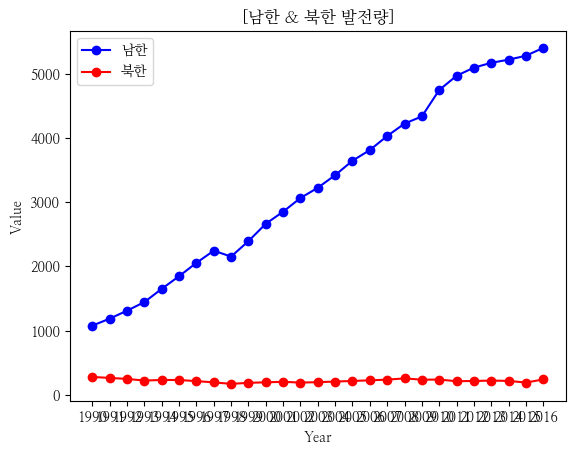

In [15]:
# data_df.loc[[('남한', '합계')], :].values
# data_df.columns.astype('int')
# dataset_1 = data_df.loc[('남한', '합계'), :]
# dataset_2 = data_df.loc[('북한', '합계'), :]

plt.plot(data_df.loc[('남한', '합계')], 'bo-', label='남한')
plt.plot(data_df.loc[('북한', '합계')], 'ro-', label='북한')
plt.title('[남한 & 북한 발전량]')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

In [16]:
def draw_line_graph(title, columns, labels, fmfs, xlabel, ylabel):
    for idx, col in enumerate(columns):
        plt.plot(data_df.loc[col], fmfs[idx])
    
    plt.title(f'--- [{title}] ---')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(labels)
    plt.show()

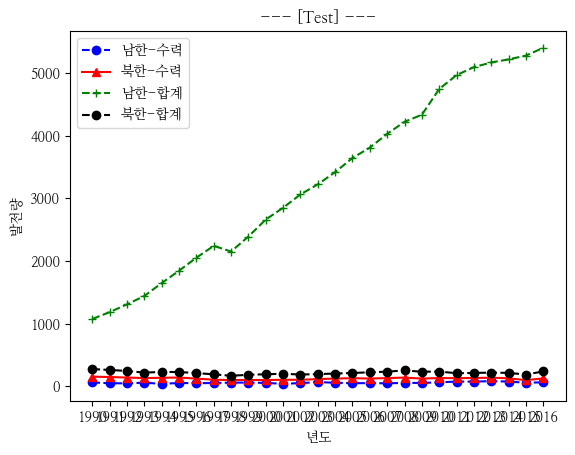

In [17]:
draw_line_graph("Test",
                [('남한', '수력'), ('북한', '수력'), ('남한', '합계'), ('북한', '합계')],
                ['남한-수력', '북한-수력', '남한-합계', '북한-합계'],
                ['bo--', 'r^-', 'g+--', 'ko--'],
                '년도', '발전량')

- 하나의 figure에 여러개 그래프 그리기

In [18]:
# - figure 객체 생성
# - 생성된 figure 객체 안에 subplot 객체 생성
#   * 그래프를 표시하는 방식 지정 : 가로/세로 몇 개 그래프 넣을지 지정
# - subplot에 그래프를 넣기

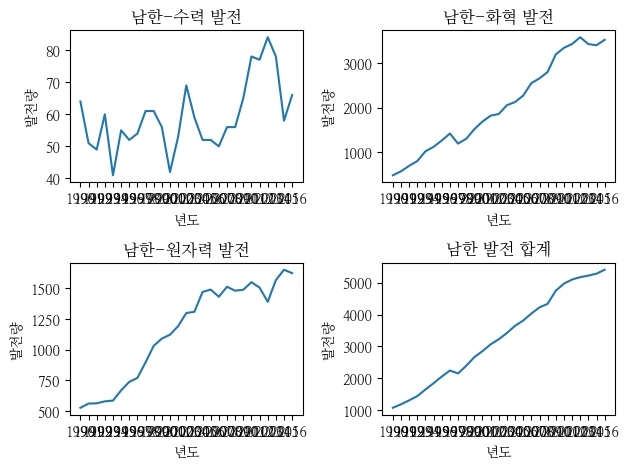

In [28]:
# -> 하나의 figure에 수력/화력/원자력/합계 그래프 넣기
# 내가 아는 문법이랑 다르네?

fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.plot(data_df.loc[('남한', '수력')], label='남한-수력')
ax2.plot(data_df.loc[('남한', '화력')], label='남한-화력')
ax3.plot(data_df.loc[('남한', '원자력')], label='남한-원자력')
ax4.plot(data_df.loc[('남한', '합계')], label='남한-합계')

# 각 subplot 별로 설정을 해야함
ax1.set_title('남한-수력 발전')
ax1.set_xlabel('년도')
ax1.set_ylabel('발전량')
ax1.set_xticks(data_df.columns)     # 세팅값이 많다...

ax2.set_title('남한-화혁 발전')
ax2.set_xlabel('년도')
ax2.set_ylabel('발전량')

ax3.set_title('남한-원자력 발전')
ax3.set_xlabel('년도')
ax3.set_ylabel('발전량')

ax4.set_title('남한 발전 합계')
ax4.set_xlabel('년도')
ax4.set_ylabel('발전량')


plt.tight_layout()
plt.show()

In [29]:
# - figure 객체 생성
# - 생성된 figure 객체 안에 subplot 객체 생성
#   * 그래프를 표시하는 방식 지정 : 가로/세로 몇 개 그래프 넣을지 지정
# - subplot에 그래프를 넣기

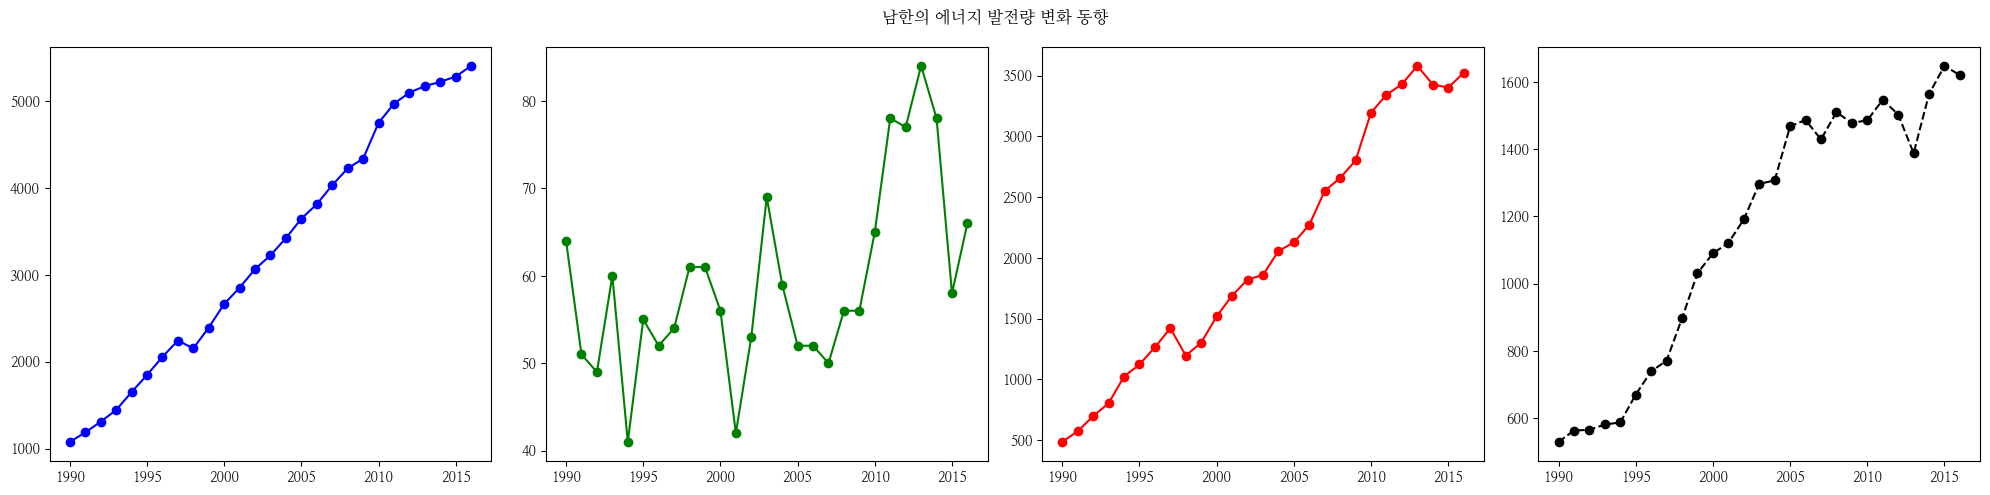

In [70]:
# -> 하나의 figure에 수력/화력/원자력/합계 그래프 넣기
import numpy as np
# 내가 아는 문법이랑 다르네?

fig = plt.figure(figsize=[20,5])

# subplot 객체 생성 : subplots() => axes 객체를 배열에 담아서 반환. 행 단위.
#                               => 행단위로 axes 담아서 반환
# axes = fig.subplots(1,4)        # 실린더 같다 ㅋㅋㅋㅋ
# print(axes)

axes = fig.subplots(1, 4)
# print(axes, axes[0], axes[0,0], axes[1,1])     # 원소 빼는 방법

# - subplot에 그래프 그리기
# 반복문을 이용해서 쭉 넣어버리면 됨
datas = data_df.index.to_list()[:4]
fmfs = ['bo-', 'go-', 'ro-', 'ko--']

for idx, ax in enumerate(axes):
    ax.plot(data_df.loc[datas[idx]], fmfs[idx])
    ax.set_xticks(np.arange(0, 26, 5), ['1990', '1995', '2000', '2005', '2010', '2015'])
    # ax.set_xticks([])

# - 전체 화면에 제목
fig.suptitle('남한의 에너지 발전량 변화 동향')

plt.tight_layout()
plt.show()